In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 
print(kerasBKED)

tensorflow


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import color
from PIL import Image
from function import cnn_model,cnn_model1
import glob
import time
from PIL import Image

Using TensorFlow backend.


In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

#30%GPU
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
session = tf.Session(config=config)

# session
KTF.set_session(session )
#%%%

In [3]:
def generate_signal_imagedata(path_txt,path_image):
    txt_file = open(path_txt)
    text = txt_file.readlines()[2:]
    count_points = len(text)
    crop_length = 30
    crop_width = 30
    all_image = np.zeros([count_points,crop_length,crop_width,3],dtype=np.uint8)
    label = np.zeros(count_points,dtype=np.int)
    crop_x = int(crop_length/2)
    crop_y = int(crop_width/2)
    image = imread(path_image)
    for i in range(count_points):
        text_piece = text[i]
        text_element = text_piece.split(',')
        l_x = int(float(text_element[0]))
        l_y = int(float(text_element[1]))
        label[i] = int(text_element[2])
        if(l_x-crop_x <0):
            l_x = crop_x
        if(l_y-crop_y <0):
            l_y = crop_y
        if(l_x+crop_x >2048):
            l_x = 2048-15
        if(l_y+crop_y >1536):
            l_y =1536-15
        all_image[i,:,:,:] = image[l_y-15:l_y+15,l_x-15:l_x+15]
    txt_file.close()
    return all_image,label

def read_generate_data(txtfolder_name,imagefloder_name):
    all_count = 1
    all_label = np.zeros(1,dtype=np.int)
    image_data = np.zeros([1,30,30,3],dtype=np.uint8)
    read_files = glob.glob(str('./')+txtfolder_name+str('/*.txt'))
    for name in read_files:
        name = name.split("/")[2]
        name = name.split(".")[0]
        path_txt = str('./')+txtfolder_name+str('/')+name+str('.txt')
        path_image = str('./')+ imagefloder_name+str('/')+name+str('.jpg')
        new_image_data,label = generate_signal_imagedata(path_txt,path_image)
        all_label = np.hstack((all_label,label))
        image_data = np.vstack((image_data,new_image_data))
        print("Image {0} is finish ".format(all_count))
        all_count = all_count+1
    final_data = image_data[1:,:,:,:]
    final_label = all_label[1:]
    return final_data,final_label



In [4]:
imagefloder_name = '2012image'
txtfolder_name = '2012raw_data'
final_data,final_label = read_generate_data(txtfolder_name,imagefloder_name)
area_data,area_label = read_generate_data('raw_lda',imagefloder_name)

Image 1 is finish 
Image 2 is finish 
Image 3 is finish 
Image 4 is finish 
Image 5 is finish 
Image 6 is finish 
Image 7 is finish 
Image 8 is finish 
Image 9 is finish 
Image 10 is finish 
Image 11 is finish 
Image 12 is finish 
Image 13 is finish 
Image 14 is finish 
Image 15 is finish 
Image 16 is finish 
Image 17 is finish 
Image 18 is finish 
Image 19 is finish 
Image 20 is finish 
Image 21 is finish 
Image 22 is finish 
Image 23 is finish 
Image 24 is finish 
Image 25 is finish 
Image 26 is finish 
Image 27 is finish 
Image 28 is finish 
Image 29 is finish 
Image 30 is finish 
Image 31 is finish 
Image 32 is finish 
Image 33 is finish 
Image 34 is finish 
Image 35 is finish 
Image 36 is finish 
Image 37 is finish 
Image 38 is finish 
Image 39 is finish 
Image 40 is finish 
Image 41 is finish 
Image 42 is finish 
Image 43 is finish 
Image 44 is finish 
Image 45 is finish 
Image 46 is finish 
Image 47 is finish 
Image 48 is finish 
Image 49 is finish 
Image 50 is finish 
Image 51 

In [5]:
area_data.shape

(18900, 30, 30, 3)

In [85]:
final_data = np.vstack((final_data,area_data))
final_label = np.hstack((final_label,area_label))

In [86]:
final_data.shape

(24900, 30, 30, 3)

In [99]:
#shuffle the data
data = final_data
label = final_label
data_shape = data.shape
data = data.reshape(-1,data_shape[1]*data_shape[2]*data_shape[3])
Z = np.column_stack((data,label))
np.random.shuffle(Z)
fully_data = Z[:,:-1]
shuffle_label = Z[:,-1]
shuffle_data = fully_data.reshape(-1,30,30,3)
batch_size = 128
num_classes = 6
epochs = 150
data_augmentation = False

# input crop image dimensions
img_rows, img_cols = 30,30

# the data, split between train and test sets
#crop_image,label = newimagedata(img_rows, img_cols)
crop_image = shuffle_data
label = shuffle_label
x_train = shuffle_data[0:22000]
x_test = shuffle_data[22000:int(shuffle_label.shape[0])]

y_train_vector = shuffle_label[0:22000]
y_test_vector = shuffle_label[22000:int(shuffle_label.shape[0])]

In [100]:
import keras
from keras import backend as K

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train_vector, num_classes)
y_test = keras.utils.to_categorical(y_test_vector, num_classes)

from function import cnn_model,cnn_model1
model = cnn_model()
model.summary()

x_train shape: (22000, 30, 30, 3)
22000 train samples
2900 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_103 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
activation_137 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_138 (Activation)  (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv

In [101]:
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
opt = keras.optimizers.Adam()
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)

history =model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              )

Train on 22000 samples, validate on 2900 samples
Epoch 1/150
22000/22000 [==============================] - 9s 394us/step - loss: 0.6136 - acc: 0.7502 - val_loss: 0.3695 - val_acc: 0.8748
Epoch 2/150
22000/22000 [==============================] - 8s 355us/step - loss: 0.3992 - acc: 0.8640 - val_loss: 0.3582 - val_acc: 0.8800
Epoch 3/150
22000/22000 [==============================] - 8s 353us/step - loss: 0.3647 - acc: 0.8755 - val_loss: 0.3635 - val_acc: 0.8738
Epoch 4/150
22000/22000 [==============================] - 8s 353us/step - loss: 0.3557 - acc: 0.8810 - val_loss: 0.3499 - val_acc: 0.8886
Epoch 5/150
22000/22000 [==============================] - 8s 353us/step - loss: 0.3468 - acc: 0.8823 - val_loss: 0.2971 - val_acc: 0.9000
Epoch 6/150
22000/22000 [==============================] - 8s 353us/step - loss: 0.3309 - acc: 0.8881 - val_loss: 0.3173 - val_acc: 0.8928
Epoch 7/150
22000/22000 [==============================] - 8s 354us/step - loss: 0.3282 - acc: 0.8868 - val_loss: 0.2

22000/22000 [==============================] - 8s 354us/step - loss: 0.0902 - acc: 0.9690 - val_loss: 0.5500 - val_acc: 0.8817
Epoch 118/150
22000/22000 [==============================] - 8s 353us/step - loss: 0.0926 - acc: 0.9695 - val_loss: 0.5054 - val_acc: 0.8869
Epoch 119/150
22000/22000 [==============================] - 8s 353us/step - loss: 0.0922 - acc: 0.9677 - val_loss: 0.5254 - val_acc: 0.8879
Epoch 120/150
22000/22000 [==============================] - 8s 354us/step - loss: 0.0968 - acc: 0.9674 - val_loss: 0.5136 - val_acc: 0.8879
Epoch 121/150
22000/22000 [==============================] - 8s 353us/step - loss: 0.0998 - acc: 0.9648 - val_loss: 0.5856 - val_acc: 0.8900
Epoch 122/150
22000/22000 [==============================] - 8s 354us/step - loss: 0.1063 - acc: 0.9646 - val_loss: 0.4991 - val_acc: 0.8848
Epoch 123/150
22000/22000 [==============================] - 8s 354us/step - loss: 0.0907 - acc: 0.9695 - val_loss: 0.5229 - val_acc: 0.8886
Epoch 124/150
22000/22000 [

In [114]:
save_dir = os.path.join(os.getcwd(), 'model_weight')
model_name = '2012_raw_lda.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

FailedPreconditionError: Attempting to use uninitialized value conv2d_115/kernel
	 [[Node: conv2d_115/kernel/_2 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_7_conv2d_115/kernel", _device="/job:localhost/replica:0/task:0/gpu:0"](conv2d_115/kernel)]]
	 [[Node: conv2d_115/kernel/_3 = _Recv[_start_time=0, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_7_conv2d_115/kernel", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

In [181]:
model = cnn_model()
model.summary()
model.load_weights('./model_weight/2012_new.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_301 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
activation_401 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_302 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_402 (Activation)  (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_151 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_201 (Dropout)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_303 (Conv2D)          (None, 14, 14, 64)        18496     
__________

In [111]:
def percent_coral(testimage):
    count = 0
    #blue = np.array([0,0,255], dtype=np.uint8)
    test = np.uint8(testimage)
    f = np.where(test[:,:,2]==255)
    count = len(f[0])
    all_pixel = test.shape[0]*test.shape[1]
    coral_percent = (count/all_pixel)*100 
    coral_percent = round(coral_percent,2)
    return coral_percent

In [112]:
def fun(x,y):
    f = test_image[x:x+30,y:y+30]
    f = f.reshape(2700)
    return f

In [113]:
def run_no_forloop(test_image,color_vector,file_image,name_image,stride):
    check_palindrome = np.frompyfunc(fun, 2, 1)
    x = np.arange(0,test_image.shape[0] - 30+1, stride)
    y = np.arange(0,test_image.shape[1] - 30+1, stride)
    X,Y = np.meshgrid(x, y)
    zs = check_palindrome(np.ravel(X.T), np.ravel(Y.T))
    fs = np.concatenate(zs,axis=0).astype(np.uint8)
    image_all_patches = fs.reshape(len(x)*len(y),30,30,3)/255
    pred = model.predict(image_all_patches,verbose=1)
    y_pred = np.argmax(pred,axis=1)
    y_pred = y_pred.reshape(len(x),len(y))
    array_y_pred = y_pred.repeat(stride, axis = 0).repeat(stride, axis = 1)
    add_column = test_image.shape[1]-len(y)*stride
    add_row = test_image.shape[0]-len(x)*stride
    temp_colomn = array_y_pred[0:len(x)*stride,len(y)*stride-1].repeat(add_column, axis = 0)
    temp_colomn = temp_colomn.reshape(len(x)*stride,add_column)
    array_y_pred_1 = np.hstack((array_y_pred,temp_colomn))
    temp_row = array_y_pred_1[len(x)*stride-1,0:test_image.shape[1]].repeat(add_row, axis = 0)
    temp_row = temp_row.reshape(test_image.shape[1],add_row).T
    array_y_pred_2 = np.vstack((array_y_pred_1,temp_row))
    result=color.label2rgb(array_y_pred_2,colors =color_vector, kind = 'overlay')
    result = np.uint8(result)
    percent = percent_coral(result)
    plt.axis('off')
    plt.imshow(result)
    fig = plt.gcf()
    fig.set_size_inches(test_image.shape[1]/100.0/3.0, test_image.shape[0]/100.0/3.0)  
    plt.gca().xaxis.set_major_locator(plt.NullLocator()) 
    plt.gca().yaxis.set_major_locator(plt.NullLocator()) 
    plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0) 
    plt.margins(0,0)
    plt.savefig('./image_result_iter/'+str(name_image)+' result'+str(percent)+'.pdf', bbox_inches='tight')
    #plt.close()
    return result, percent

In [114]:
color_vector = np.zeros([6,3])
color_vector[0] = np.array((0,0,255))
color_vector[1] = np.array((105,105,105))
color_vector[2] = np.array((169,169,169))
color_vector[3] = np.array((255,0,0))
color_vector[4] = np.array((0,255,0))
color_vector[5] = np.array((255,255,0))

84924/84924 [==============================] - 17s 199us/step
---image1 finished in 19.51663303375244 seconds ---
there are 38.58% coral in this image


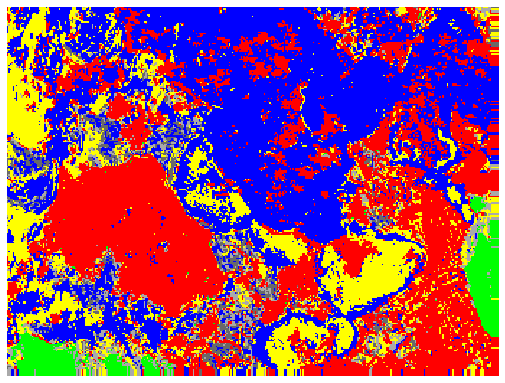

In [182]:
path_image = './2012image/201208172_T-12-58-58_Dive_01_041.jpg'
test_image = imread(path_image)
stride = 6
file_image = '2012image'
name_image = '201208172_T-12-58-58_Dive_01_041'
count = 1
start_time = time.time()
result,percent = run_no_forloop(test_image,color_vector,file_image,name_image,stride)
print(("---image%d finished in %s seconds ---" % (count,(time.time()-start_time))))
print("there are {0}% coral in this image".format(percent))


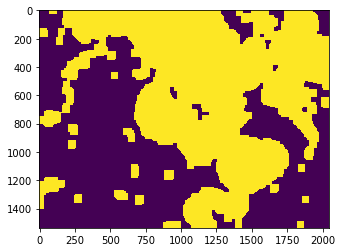

In [62]:
import skimage.morphology as sm
%matplotlib inline
dst2 = sm.binary_erosion(ve_a,sm.square(30))
dst1 = sm.binary_dilation(dst2,sm.square(30))
dst1 = sm.binary_dilation(dst1,sm.square(30))
dst1 = sm.binary_erosion(dst1,sm.square(40))
dst1 = sm.binary_dilation(dst1,sm.square(50))
dst1 = sm.binary_erosion(dst1,sm.square(20))
plt.imshow(dst1)

In [183]:
#%%
from sklearn.metrics import classification_report, confusion_matrix
labels = imread("./image_ground_truth/201208172_T-12-58-58_Dive_01_041_json/label.png")
#%%
f = np.where(result[:,:,2]==255)
test_result = np.zeros([1536,2048])
test_result[f[0],f[1]]=1
#%%

labels = labels.reshape(labels.shape[0]*labels.shape[1])
test_result = test_result.reshape(test_result.shape[0]*test_result.shape[1])
cf = confusion_matrix(labels, test_result)
print (cf) 
#%%
false_alarm= cf[0,1]/(cf[0,1]+cf[1,1])
misdetection = cf[1,0]/(cf[1,0]+cf[0,0])
print(false_alarm)
print(misdetection)

#%%
import tensorflow as tf
with tf.Session() as sess:
    ypredT = tf.constant(test_result)
    ytrueT = tf.constant(labels)
    iou,conf_mat = tf.metrics.mean_iou(ytrueT, ypredT, num_classes=2)
    sess.run(tf.local_variables_initializer())
    conf_mat = sess.run([conf_mat])
    miou = sess.run([iou])
    print(miou)   


[[1347859  308203]
 [ 584117  905549]]
0.2539258431705983
0.3023417475165323
[0.5526769]


In [31]:
cf[0,1]

46682

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = [0,1,0,1]
y_pred = [1,1,1,0]
confusion_matrix(y_true, y_pred)


array([[0, 2],
       [1, 1]])

In [20]:
import numpy as np
from numpy import ma
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import Formatter, FixedLocator
from matplotlib import rcParams


# BUG: this example fails with any other setting of axisbelow
rcParams['axes.axisbelow'] = False


class MercatorLatitudeScale(mscale.ScaleBase):
    """
    Scales data in range -pi/2 to pi/2 (-90 to 90 degrees) using
    the system used to scale latitudes in a Mercator projection.

    The scale function:
      ln(tan(y) + sec(y))

    The inverse scale function:
      atan(sinh(y))

    Since the Mercator scale tends to infinity at +/- 90 degrees,
    there is user-defined threshold, above and below which nothing
    will be plotted.  This defaults to +/- 85 degrees.

    source:
    http://en.wikipedia.org/wiki/Mercator_projection
    """

    # The scale class must have a member ``name`` that defines the string used
    # to select the scale.  For example, ``gca().set_yscale("mercator")`` would
    # be used to select this scale.
    name = 'mercator'

    def __init__(self, axis, *, thresh=np.deg2rad(85), **kwargs):
        """
        Any keyword arguments passed to ``set_xscale`` and ``set_yscale`` will
        be passed along to the scale's constructor.

        thresh: The degree above which to crop the data.
        """
        super().__init__(axis)
        if thresh >= np.pi / 2:
            raise ValueError("thresh must be less than pi/2")
        self.thresh = thresh

    def get_transform(self):
        """
        Override this method to return a new instance that does the
        actual transformation of the data.

        The MercatorLatitudeTransform class is defined below as a
        nested class of this one.
        """
        return self.MercatorLatitudeTransform(self.thresh)

    def set_default_locators_and_formatters(self, axis):
        """
        Override to set up the locators and formatters to use with the
        scale.  This is only required if the scale requires custom
        locators and formatters.  Writing custom locators and
        formatters is rather outside the scope of this example, but
        there are many helpful examples in ``ticker.py``.

        In our case, the Mercator example uses a fixed locator from
        -90 to 90 degrees and a custom formatter class to put convert
        the radians to degrees and put a degree symbol after the
        value::
        """
        class DegreeFormatter(Formatter):
            def __call__(self, x, pos=None):
                return "%d\N{DEGREE SIGN}" % np.degrees(x)

        axis.set_major_locator(FixedLocator(
            np.radians(np.arange(-90, 90, 10))))
        axis.set_major_formatter(DegreeFormatter())
        axis.set_minor_formatter(DegreeFormatter())

    def limit_range_for_scale(self, vmin, vmax, minpos):
        """
        Override to limit the bounds of the axis to the domain of the
        transform.  In the case of Mercator, the bounds should be
        limited to the threshold that was passed in.  Unlike the
        autoscaling provided by the tick locators, this range limiting
        will always be adhered to, whether the axis range is set
        manually, determined automatically or changed through panning
        and zooming.
        """
        return max(vmin, -self.thresh), min(vmax, self.thresh)

    class MercatorLatitudeTransform(mtransforms.Transform):
        # There are two value members that must be defined.
        # ``input_dims`` and ``output_dims`` specify number of input
        # dimensions and output dimensions to the transformation.
        # These are used by the transformation framework to do some
        # error checking and prevent incompatible transformations from
        # being connected together.  When defining transforms for a
        # scale, which are, by definition, separable and have only one
        # dimension, these members should always be set to 1.
        input_dims = 1
        output_dims = 1
        is_separable = True
        has_inverse = True

        def __init__(self, thresh):
            mtransforms.Transform.__init__(self)
            self.thresh = thresh

        def transform_non_affine(self, a):
            """
            This transform takes an Nx1 ``numpy`` array and returns a
            transformed copy.  Since the range of the Mercator scale
            is limited by the user-specified threshold, the input
            array must be masked to contain only valid values.
            ``matplotlib`` will handle masked arrays and remove the
            out-of-range data from the plot.  Importantly, the
            ``transform`` method *must* return an array that is the
            same shape as the input array, since these values need to
            remain synchronized with values in the other dimension.
            """
            masked = ma.masked_where((a < -self.thresh) | (a > self.thresh), a)
            if masked.mask.any():
                return ma.log(np.abs(ma.tan(masked) + 1.0 / ma.cos(masked)))
            else:
                return np.log(np.abs(np.tan(a) + 1.0 / np.cos(a)))

        def inverted(self):
            """
            Override this method so matplotlib knows how to get the
            inverse transform for this transform.
            """
            return MercatorLatitudeScale.InvertedMercatorLatitudeTransform(
                self.thresh)

    class InvertedMercatorLatitudeTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True
        has_inverse = True

        def __init__(self, thresh):
            mtransforms.Transform.__init__(self)
            self.thresh = thresh

        def transform_non_affine(self, a):
            return np.arctan(np.sinh(a))

        def inverted(self):
            return MercatorLatitudeScale.MercatorLatitudeTransform(self.thresh)

# Now that the Scale class has been defined, it must be registered so
# that ``matplotlib`` can find it.
mscale.register_scale(MercatorLatitudeScale)


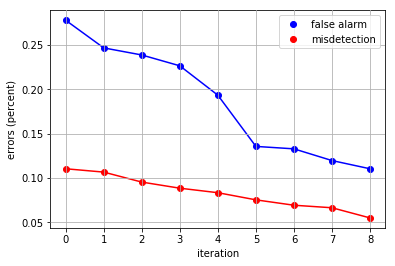

In [23]:
#plot the error for each iteration
import matplotlib.pyplot as plt
iter_order = np.arange(0,9,1)
error_iter = np.array([0.2776,0.24647,0.2385,0.2263,0.19324,0.13556,0.13282,0.11964,0.11038])
miou_iter = np.array([0.1104,0.10664,0.0954,0.08852,0.08344,0.0754,0.06934,0.0665,0.05506])
p1 = plt.plot(iter_order,error_iter,'b')
p1 = plt.plot(iter_order,error_iter,'bo')
p2 = plt.plot(iter_order,miou_iter,'r')
p2 = plt.plot(iter_order,miou_iter,'ro')
plt.legend((p1[0],p2[0]),('false alarm',"misdetection"),fontsize=10)
plt.xlabel('iteration')
plt.ylabel('errors (percent)')
plt.grid(True)